In [1]:
import pandas as pd 
import numpy as np

In [2]:
cc_info = pd.read_csv('/home/nikit/Desktop/Take_home_Challenges/credit_card_transactions/cc_info.csv')
transaction = pd.read_csv('/home/nikit/Desktop/Take_home_Challenges/credit_card_transactions/transactions.csv')
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [3]:
transaction.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [4]:
len(np.unique(cc_info.credit_card))==len(np.unique(transaction.credit_card))

True

In [5]:
total_transactions = dict(transaction['credit_card'].value_counts())
tt = []
for i,cc in enumerate(cc_info.credit_card):
    tt.append(total_transactions[cc])
cc_info['total_transactions'] = tt
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit,total_transactions
0,1280981422329509,Dallas,PA,18612,6000,316
1,9737219864179988,Houston,PA,15342,16000,429
2,4749889059323202,Auburn,MA,1501,14000,250
3,9591503562024072,Orlando,WV,26412,18000,412
4,2095640259001271,New York,NY,10001,20000,580


In [6]:
sum_of_all_transactions = dict(transaction.groupby(['credit_card'])['transaction_dollar_amount'].sum())
tt = []
for i,cc in enumerate(cc_info.credit_card):
    tt.append(sum_of_all_transactions[cc])
cc_info['sum_of_all_transactions_in_threeMonths'] = tt
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit,total_transactions,sum_of_all_transactions_in_threeMonths
0,1280981422329509,Dallas,PA,18612,6000,316,16767.89
1,9737219864179988,Houston,PA,15342,16000,429,44370.56
2,4749889059323202,Auburn,MA,1501,14000,250,25128.09
3,9591503562024072,Orlando,WV,26412,18000,412,43217.20
4,2095640259001271,New York,NY,10001,20000,580,48546.94


In [7]:
from datetime import datetime
time = []
date_format = "%Y-%m-%d %H:%M:%S"
for i,timestamp in enumerate(transaction.date):
    time.append(datetime.strptime(timestamp,date_format).strftime('%B'))
transaction['Month'] = time
transaction.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,Month
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,September
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,October
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,October
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,October
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,October


In [29]:
July = []
August = []
September = []
October = []
x = dict(transaction.groupby(['credit_card','Month'])['transaction_dollar_amount'].sum())
for i,cc in enumerate(cc_info.credit_card):
    if (cc,'July') in x:
        July.append(x[(cc,'July')])
    else:
        July.append(1.0)
    if (cc,'August') in x:
        August.append(x[(cc,'August')])
    else:
        August.append(1.0)
    if (cc,'September') in x:
        September.append(x[(cc,'September')])
    else:
        September.append(1.0)
    if (cc,'October') in x:
        October.append(x[(cc,'October')])
    else:
        October.append(1.0)
cc_info['July'] = July
cc_info['August'] = August
cc_info['September'] = September
cc_info['October'] = October
cc_info.head()
    

,credit_card,city,state,zipcode,credit_card_limit,total_transactions,sum_of_all_transactions_in_threeMonths,July,August,September,October
0,1280981422329509,Dallas,PA,18612,6000,316,16767.89,950.65,6171.35,4681.90,4963.99
1,9737219864179988,Houston,PA,15342,16000,429,44370.56,283.62,16156.60,14228.08,13702.26
2,4749889059323202,Auburn,MA,1501,14000,250,25128.09,459.77,9134.67,8233.17,7300.48
3,9591503562024072,Orlando,WV,26412,18000,412,43217.20,1104.79,16328.86,14219.26,11564.29
4,2095640259001271,New York,NY,10001,20000,580,48546.94,425.71,16222.71,16753.26,15145.26


In [30]:
import seaborn as sns
from matplotlib import pyplot as plt
import math


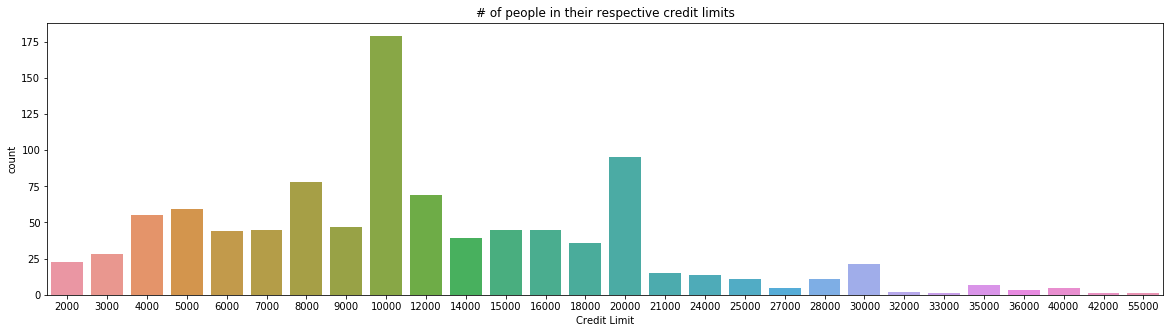

In [71]:
x = cc_info.credit_card_limit.apply(lambda x: x).tolist()
fig = plt.figure(figsize=(20,5))
sns.countplot(x)
plt.xlabel('Credit Limit')
plt.title("# of people in their respective credit limits")
plt.show()

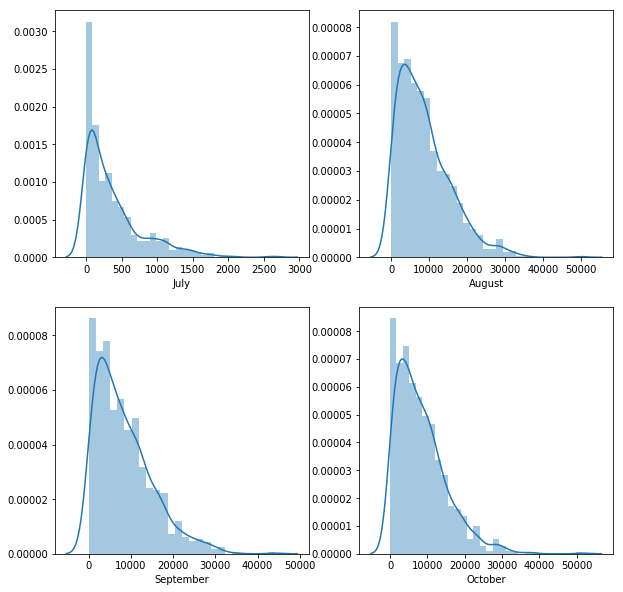

In [54]:
fig,ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2)
sns.distplot(cc_info.July,ax=ax[0][0])
sns.distplot(cc_info.August,ax=ax[0][1])
sns.distplot(cc_info.September,ax=ax[1][0])
sns.distplot(cc_info.October,ax=ax[1][1])
plt.show()


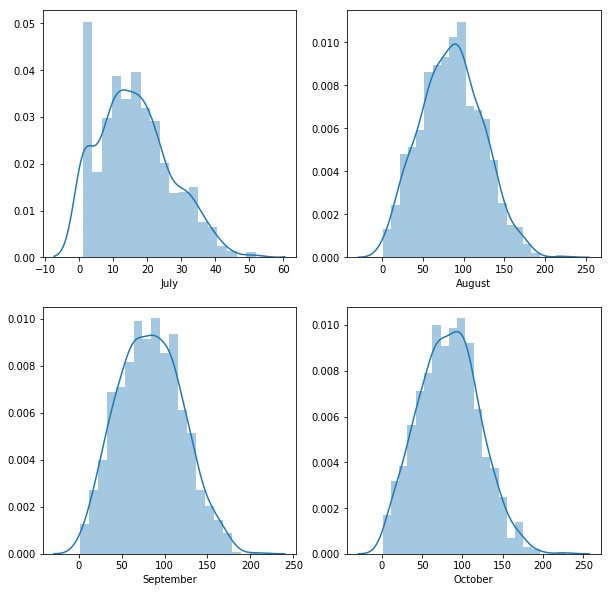

In [56]:
fig,ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2)
sns.distplot(cc_info.July.apply(lambda x: math.sqrt(x)),ax=ax[0][0])
sns.distplot(cc_info.August.apply(lambda x: math.sqrt(x)),ax=ax[0][1])
sns.distplot(cc_info.September.apply(lambda x: math.sqrt(x)),ax=ax[1][0])
sns.distplot(cc_info.October.apply(lambda x: math.sqrt(x)),ax=ax[1][1])
plt.show()


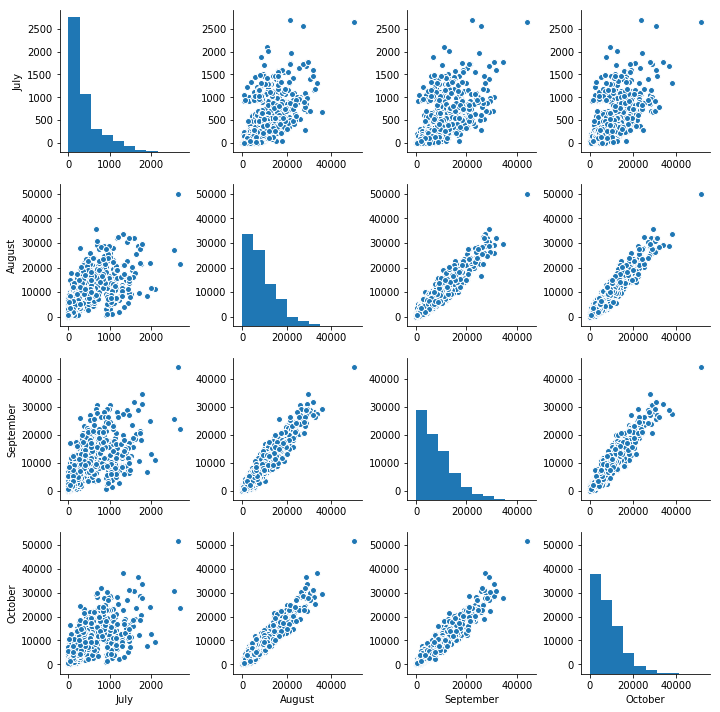

In [61]:
monthly_transactions = cc_info[cc_info.columns[7:11]]
sns.pairplot(monthly_transactions)
plt.show()

In [102]:
x = np.asarray(monthly_transactions.values)
shuffle_indices = np.random.permutation(np.arange(len(x)))
x = x[shuffle_indices]
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(x,test_size=.1)

In [103]:
mean_train_data = np.mean(x_train,axis=0)
mean_train_data

array([  374.60314124,  8553.13502825,  8267.12176271,  8271.76891525])

In [104]:
x_train_transposed = x_train.T
covariance = np.cov(x_train_transposed)
covariance

array([[   171724.99299962,   1789254.26027061,   1713470.56033371,
          1773694.74234481],
       [  1789254.26027061,  44592994.9399626 ,  41536175.7374097 ,
         41761671.04749711],
       [  1713470.56033371,  41536175.7374097 ,  42764923.26169848,
         40738065.0979612 ],
       [  1773694.74234481,  41761671.04749711,  40738065.0979612 ,
         42983624.06374951]])

In [105]:
from scipy.stats import multivariate_normal
p_of_x = multivariate_normal.pdf(x_train,mean=mean_train_data,cov=covariance)

np.max(p_of_x)

3.3056155289633629e-15

In [106]:
p_of_x_test = multivariate_normal.pdf(x_test,mean_train_data,covariance)
np.max(p_of_x_test)

3.1124995263873161e-15

In [109]:
p_of_x_test

array([  2.05459065e-15,   1.09195420e-15,   2.47964675e-15,
         1.44058902e-15,   1.24551294e-15,   1.73611451e-15,
         6.47402042e-16,   1.45978972e-15,   9.67945275e-16,
         2.65861602e-15,   2.60234494e-15,   7.74738403e-16,
         1.79755453e-15,   8.82734985e-17,   3.48071936e-17,
         2.22279518e-15,   5.23725293e-17,   1.57557079e-15,
         1.57784569e-15,   1.35053089e-15,   7.98563026e-16,
         1.54730615e-15,   1.19638143e-15,   1.49638586e-15,
         1.54277867e-15,   2.06826602e-15,   1.30020007e-15,
         4.55048192e-17,   1.22903186e-16,   7.48383657e-16,
         1.89770526e-15,   2.80692757e-15,   2.18354127e-15,
         2.11714862e-15,   1.00776554e-15,   3.48460913e-17,
         1.72435970e-15,   1.97322248e-15,   1.97614660e-16,
         4.05970865e-16,   7.91461301e-27,   1.42579472e-16,
         1.69447702e-15,   8.97197254e-17,   7.25492647e-16,
         1.03000513e-15,   2.04871281e-15,   5.32041829e-17,
         7.31395282e-20,